# Data Preprocessing

#### importing data set

In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import norm
import statistics
import pandas_profiling
import pandas_profiling as pf
from pandas_profiling import ProfileReport
from sklearn import metrics

/var/folders/by/ymb55j1n39nd_1l6_11kg8j80000gn/T/ipykernel_41157/2799548875.py:17: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
spy=pd.read_csv("Covid_Data_new - Covid_Data_new.csv")

In [3]:
sts=spy.copy()

In [4]:
#kk=ProfileReport(spy)

In [5]:
#kk

In [6]:
#kk.to_file("output.html")

In [7]:
#sts=pd.read_csv("Covid_Data_new - Covid_Data_new.csv")


In [8]:
sts

,age,body_temperature,chronic_disease,breathing_issue,Blood O2 Level in Percentage,Needed Hospitalization
0,10.0,Normal,no,no,97.0,No
1,12.0,Normal,no,no,97.0,No
2,15.0,Normal,no,no,94.0,No
3,10.0,Normal,no,no,97.0,No
4,13.0,Moderate,no,no,94.0,No
...,...,...,...,...,...,...
65,86.0,High,no,yes,76.0,Yes
66,61.0,Moderate,no,yes,90.0,No
67,94.0,High,yes,yes,64.0,Yes
68,81.0,High,yes,yes,75.0,Yes


In [9]:
sts.head()

,age,body_temperature,chronic_disease,breathing_issue,Blood O2 Level in Percentage,Needed Hospitalization
0,10.0,Normal,no,no,97.0,No
1,12.0,Normal,no,no,97.0,No
2,15.0,Normal,no,no,94.0,No
3,10.0,Normal,no,no,97.0,No
4,13.0,Moderate,no,no,94.0,No


In [10]:
sts.tail()

,age,body_temperature,chronic_disease,breathing_issue,Blood O2 Level in Percentage,Needed Hospitalization
65,86.0,High,no,yes,76.0,Yes
66,61.0,Moderate,no,yes,90.0,No
67,94.0,High,yes,yes,64.0,Yes
68,81.0,High,yes,yes,75.0,Yes
69,76.0,High,yes,yes,80.0,Yes


In [11]:
sts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           69 non-null     float64
 1   body_temperature              70 non-null     object 
 2   chronic_disease               70 non-null     object 
 3   breathing_issue               70 non-null     object 
 4   Blood O2 Level in Percentage  69 non-null     float64
 5   Needed Hospitalization        70 non-null     object 
dtypes: float64(2), object(4)
memory usage: 3.4+ KB


In [12]:
sts.describe()

,age,Blood O2 Level in Percentage
count,69.000000,69.000000
mean,45.130435,82.072464
std,24.223781,11.702587
min,10.000000,53.000000
25%,25.000000,72.000000
50%,42.000000,86.000000
75%,62.000000,92.000000
max,94.000000,99.000000


In [13]:
sts.groupby('Needed Hospitalization').count()

,age,body_temperature,chronic_disease,breathing_issue,Blood O2 Level in Percentage
Needed Hospitalization,,,,,
No,37,38,38,38,37
Yes,32,32,32,32,32


In [14]:
sts['age'].value_counts()

10.0    2
26.0    2
59.0    2
61.0    2
56.0    2
12.0    2
40.0    2
86.0    2
35.0    2
30.0    2
28.0    2
32.0    2
62.0    2
25.0    2
20.0    2
15.0    2
13.0    2
18.0    2
19.0    2
70.0    1
68.0    1
69.0    1
64.0    1
84.0    1
78.0    1
90.0    1
75.0    1
80.0    1
82.0    1
81.0    1
63.0    1
94.0    1
74.0    1
52.0    1
54.0    1
53.0    1
60.0    1
58.0    1
36.0    1
50.0    1
49.0    1
42.0    1
48.0    1
46.0    1
38.0    1
29.0    1
24.0    1
16.0    1
17.0    1
76.0    1
Name: age, dtype: int64

In [15]:
sts.age.value_counts()

10.0    2
26.0    2
59.0    2
61.0    2
56.0    2
12.0    2
40.0    2
86.0    2
35.0    2
30.0    2
28.0    2
32.0    2
62.0    2
25.0    2
20.0    2
15.0    2
13.0    2
18.0    2
19.0    2
70.0    1
68.0    1
69.0    1
64.0    1
84.0    1
78.0    1
90.0    1
75.0    1
80.0    1
82.0    1
81.0    1
63.0    1
94.0    1
74.0    1
52.0    1
54.0    1
53.0    1
60.0    1
58.0    1
36.0    1
50.0    1
49.0    1
42.0    1
48.0    1
46.0    1
38.0    1
29.0    1
24.0    1
16.0    1
17.0    1
76.0    1
Name: age, dtype: int64

In [16]:
sts.dtypes

age                             float64
body_temperature                 object
chronic_disease                  object
breathing_issue                  object
Blood O2 Level in Percentage    float64
Needed Hospitalization           object
dtype: object

In [17]:
sts.isnull().sum()

age                             1
body_temperature                0
chronic_disease                 0
breathing_issue                 0
Blood O2 Level in Percentage    1
Needed Hospitalization          0
dtype: int64

In [18]:
sts.age.fillna(sts.age.mean(),inplace=True)

In [19]:
sts['Blood O2 Level in Percentage'].fillna(sts['Blood O2 Level in Percentage'].median(),inplace=True)

In [20]:
sts.isnull().sum()

age                             0
body_temperature                0
chronic_disease                 0
breathing_issue                 0
Blood O2 Level in Percentage    0
Needed Hospitalization          0
dtype: int64

In [21]:
sts.duplicated().sum()

1

In [22]:
sts.drop_duplicates(inplace=True)

In [23]:
sts.duplicated().sum()

0

<AxesSubplot:>

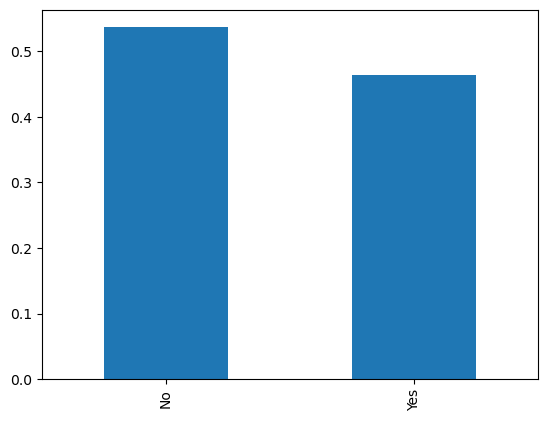

In [24]:
sts['Needed Hospitalization'].value_counts(normalize=True).plot.bar()

<AxesSubplot:ylabel='Frequency'>

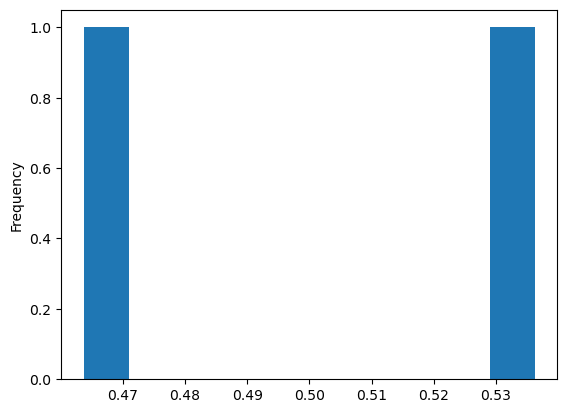

In [25]:
sts['Needed Hospitalization'].value_counts(normalize=True).plot.hist()

<AxesSubplot:xlabel='Needed Hospitalization', ylabel='count'>

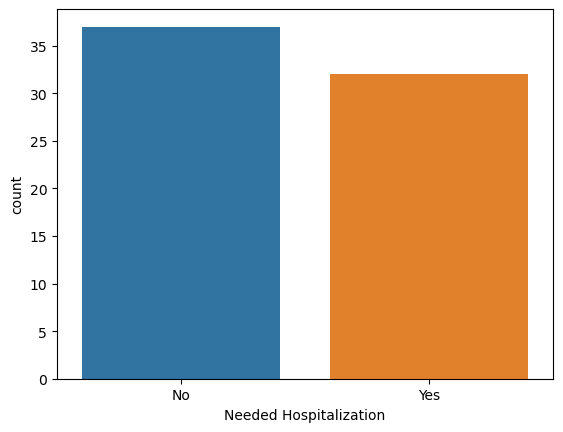

In [26]:
sns.countplot(x='Needed Hospitalization',data=sts)

<AxesSubplot:xlabel='chronic_disease', ylabel='count'>

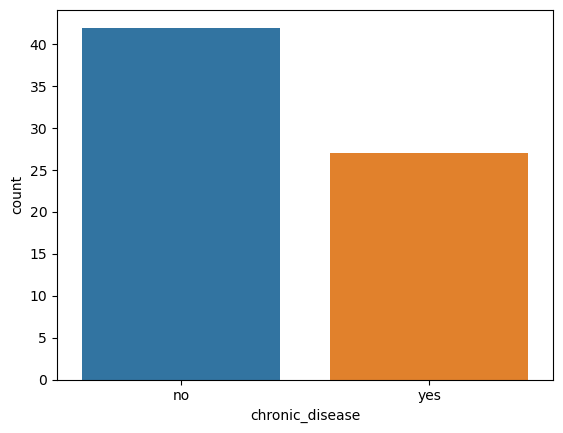

In [27]:
sns.countplot(x='chronic_disease',data=sts)

<AxesSubplot:xlabel='breathing_issue', ylabel='count'>

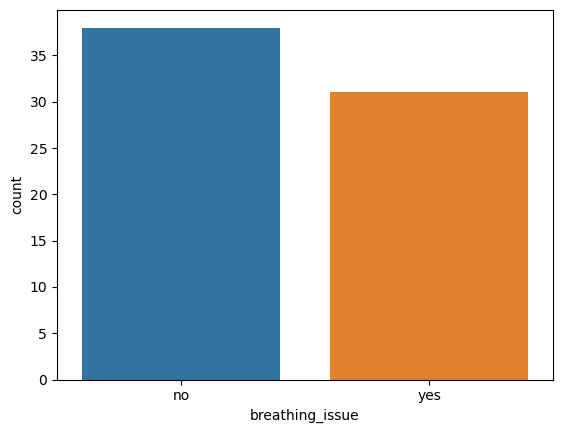

In [28]:
sns.countplot(x='breathing_issue',data=sts)

<AxesSubplot:xlabel='body_temperature', ylabel='count'>

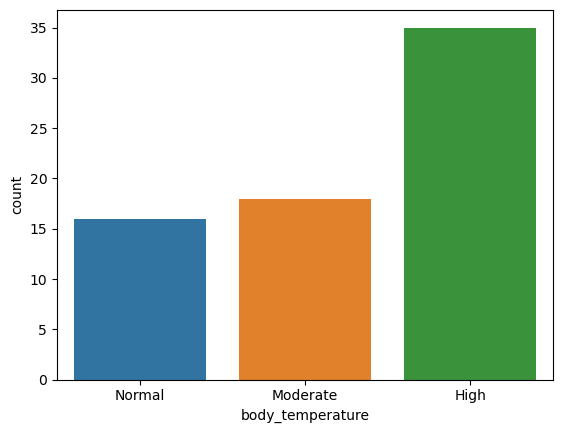

In [29]:
sns.countplot(x='body_temperature',data=sts)

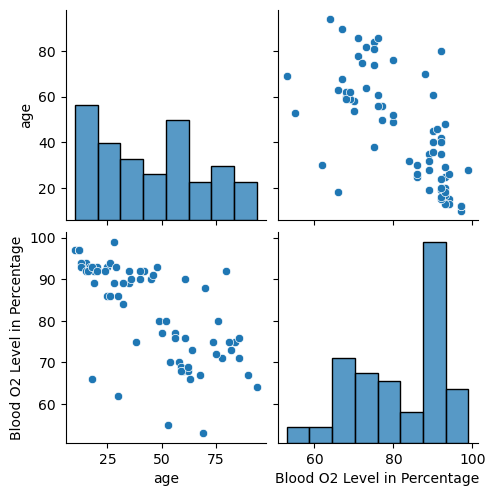

In [30]:
sns.pairplot(sts)#continous value

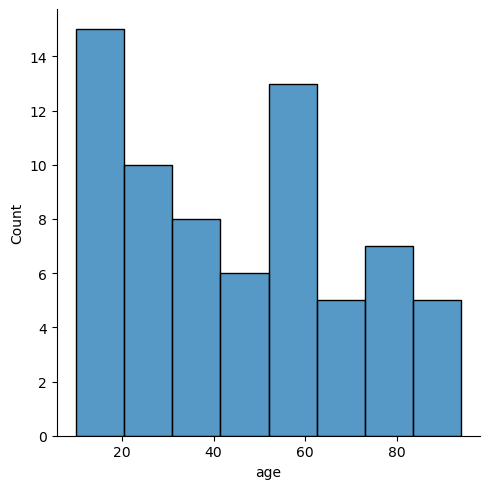

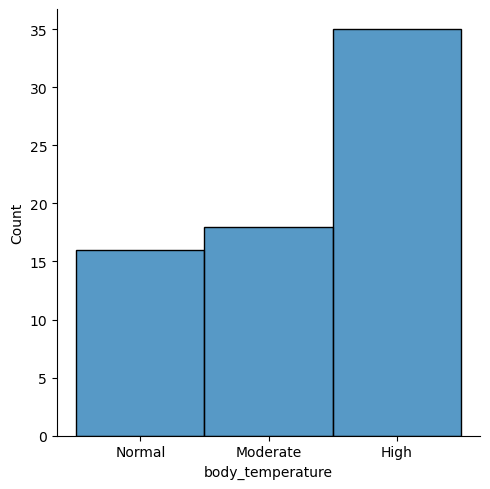

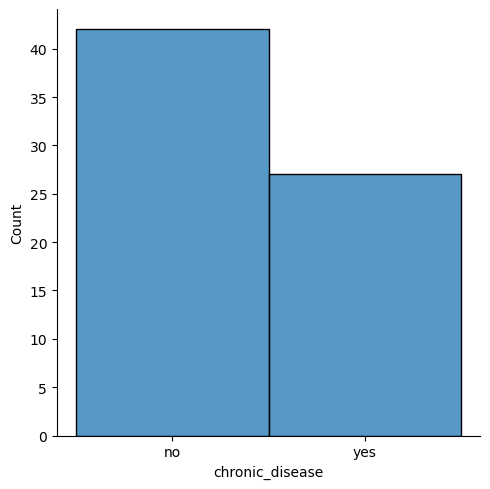

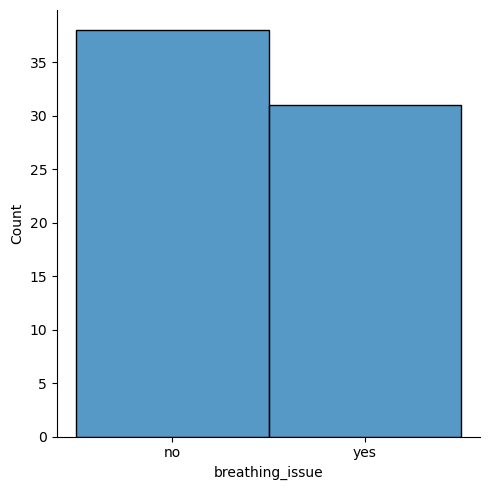

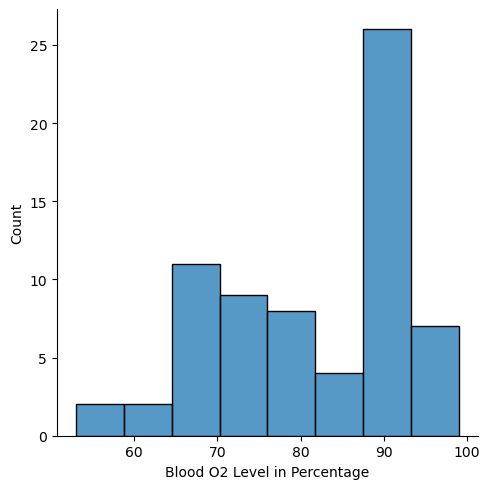

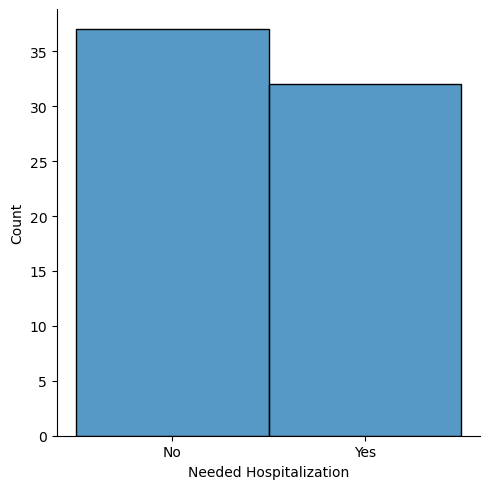

In [31]:
#creating for loop to get the distributon plot for all columns
for columns in sts:
    sns.displot(x=columns,data=sts)

## Categorical Vs Categorical

<AxesSubplot:xlabel='chronic_disease', ylabel='count'>

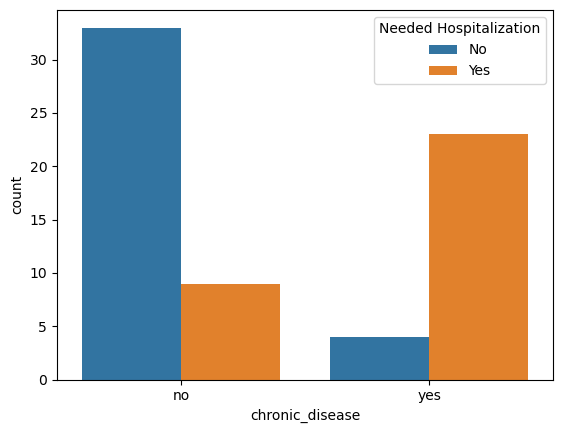

In [32]:
#analysis categorical vs Categorical
sns.countplot(x='chronic_disease',hue='Needed Hospitalization',data=sts)

#### Those who should not have chronics diseases have no need of hospitalization & Those who have chronic disease have more need of hospitalization

<AxesSubplot:xlabel='chronic_disease'>

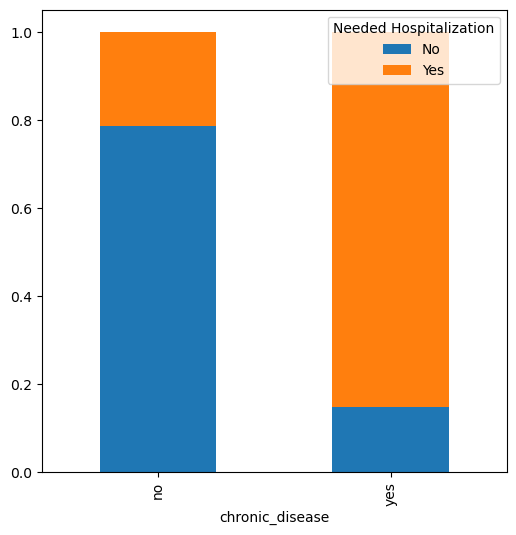

In [33]:
#second technique using crossstab
lbs=pd.crosstab(sts['chronic_disease'],sts['Needed Hospitalization'])
lbs.div(lbs.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,6))

# Categorical vs Categorical

<AxesSubplot:xlabel='body_temperature', ylabel='count'>

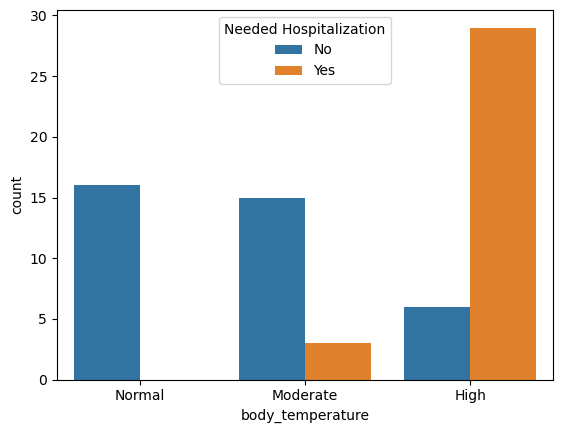

In [34]:
#analysis categorical vs Categorical
sns.countplot(x='body_temperature',hue='Needed Hospitalization',data=sts)

### Those who have normal and moderate body temperature have no need of hospitalization
# Those who have high body temperature have need of hospitalization

<AxesSubplot:xlabel='breathing_issue', ylabel='count'>

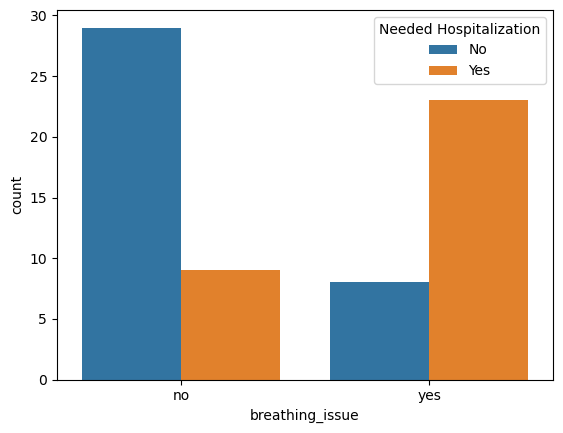

In [35]:
sns.countplot(x='breathing_issue',hue='Needed Hospitalization',data=sts)

### Those who didn't has breathing issue has no need of Hospitalization
##Those who have breathing issue who have more need of Hospitalization

# Categorical vs Continuous

<AxesSubplot:xlabel='Needed Hospitalization', ylabel='age'>

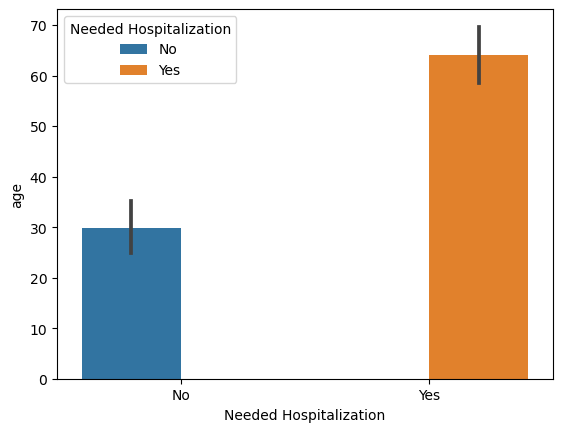

In [36]:
sns.barplot(x='Needed Hospitalization',y='age',hue='Needed Hospitalization',data=sts)

### The person whose age is less than thirty have no need of Hospitalization ANd The the person 
# those whose age is above 30 has need of hospitalization

<AxesSubplot:xlabel='Needed Hospitalization', ylabel='Blood O2 Level in Percentage'>

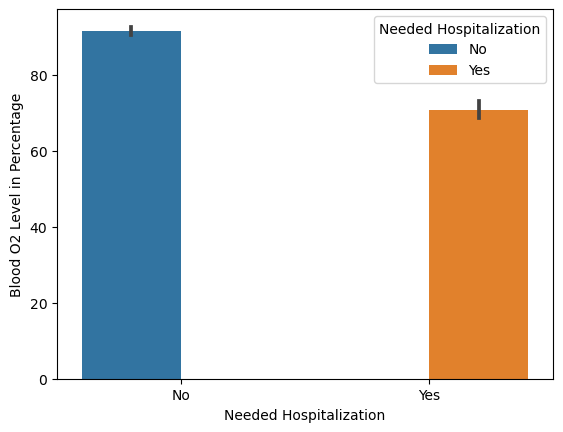

In [37]:
sns.barplot(x='Needed Hospitalization',y='Blood O2 Level in Percentage',hue='Needed Hospitalization',data=sts)

## Those who have have oxygen percentage  greater than 80 is no need of hospitalization & Those oxygen level below 80 is need of hospitalization

<AxesSubplot:xlabel='Blood O2 Level in Percentage', ylabel='count'>

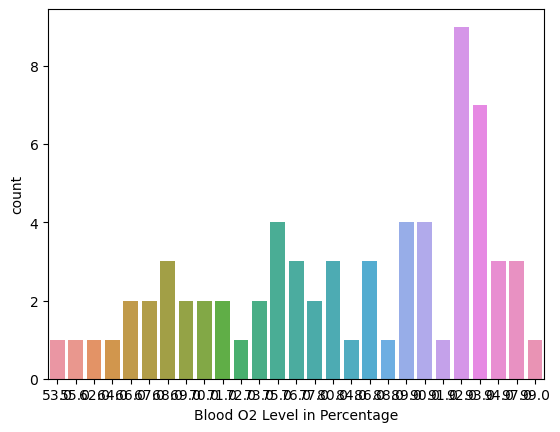

In [38]:
sns.countplot(x='Blood O2 Level in Percentage',data=sts)

# change categorical data into numerical data

## Nominal first i will change independent categorrical data using one hot encoding or dummy or simply using replace function

In [39]:
sts=pd.get_dummies(sts,prefix=['body_temperature','chronic_disease','breathing_issue'],columns=['body_temperature','chronic_disease','breathing_issue'])

## then dependent using label encoding

In [40]:
#Encoding
label_encode=LabelEncoder()

In [41]:
labels=label_encode.fit_transform(sts['Needed Hospitalization'])

In [42]:
print(labels)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1]


In [43]:
sts['target']=labels

In [44]:
sts #0->no need of hospitalization,1->need of hospitalization

,age,Blood O2 Level in Percentage,Needed Hospitalization,body_temperature_High,body_temperature_Moderate,body_temperature_Normal,chronic_disease_no,chronic_disease_yes,breathing_issue_no,breathing_issue_yes,target
0,10.0,97.0,No,0,0,1,1,0,1,0,0
1,12.0,97.0,No,0,0,1,1,0,1,0,0
2,15.0,94.0,No,0,0,1,1,0,1,0,0
4,13.0,94.0,No,0,1,0,1,0,1,0,0
5,12.0,97.0,No,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
65,86.0,76.0,Yes,1,0,0,1,0,0,1,1
66,61.0,90.0,No,0,1,0,1,0,0,1,0
67,94.0,64.0,Yes,1,0,0,0,1,0,1,1
68,81.0,75.0,Yes,1,0,0,0,1,0,1,1


In [45]:
sts=sts.drop(columns='Needed Hospitalization',axis=1)

In [46]:
sts

,age,Blood O2 Level in Percentage,body_temperature_High,body_temperature_Moderate,body_temperature_Normal,chronic_disease_no,chronic_disease_yes,breathing_issue_no,breathing_issue_yes,target
0,10.0,97.0,0,0,1,1,0,1,0,0
1,12.0,97.0,0,0,1,1,0,1,0,0
2,15.0,94.0,0,0,1,1,0,1,0,0
4,13.0,94.0,0,1,0,1,0,1,0,0
5,12.0,97.0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
65,86.0,76.0,1,0,0,1,0,0,1,1
66,61.0,90.0,0,1,0,1,0,0,1,0
67,94.0,64.0,1,0,0,0,1,0,1,1
68,81.0,75.0,1,0,0,0,1,0,1,1


## Divide data for in x and Y set

In [47]:
X=sts.drop('target',axis=1)

In [48]:
Y=sts['target']

In [49]:
X

,age,Blood O2 Level in Percentage,body_temperature_High,body_temperature_Moderate,body_temperature_Normal,chronic_disease_no,chronic_disease_yes,breathing_issue_no,breathing_issue_yes
0,10.0,97.0,0,0,1,1,0,1,0
1,12.0,97.0,0,0,1,1,0,1,0
2,15.0,94.0,0,0,1,1,0,1,0
4,13.0,94.0,0,1,0,1,0,1,0
5,12.0,97.0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
65,86.0,76.0,1,0,0,1,0,0,1
66,61.0,90.0,0,1,0,1,0,0,1
67,94.0,64.0,1,0,0,0,1,0,1
68,81.0,75.0,1,0,0,0,1,0,1


In [50]:
Y

0     0
1     0
2     0
4     0
5     0
     ..
65    1
66    0
67    1
68    1
69    1
Name: target, Length: 69, dtype: int64

## Data standarization

In [51]:
#scale the feature from MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
X=scalers.fit_transform(X)

In [52]:
X

array([[0.        , 0.95652174, 0.        , 0.        , 1.        ,
        1.        , 0.        , 1.        , 0.        ],
       [0.02380952, 0.95652174, 0.        , 0.        , 1.        ,
        1.        , 0.        , 1.        , 0.        ],
       [0.05952381, 0.89130435, 0.        , 0.        , 1.        ,
        1.        , 0.        , 1.        , 0.        ],
       [0.03571429, 0.89130435, 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        ],
       [0.02380952, 0.95652174, 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        ],
       [0.03571429, 0.86956522, 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        ],
       [0.05952381, 0.84782609, 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        ],
       [0.0952381 , 0.2826087 , 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        ],


In [53]:
#Standardization of data
scaler=StandardScaler()

In [54]:
X=scaler.fit_transform(X)

In [55]:
X

array([[-1.50585597,  1.3134771 , -1.01459931, -0.59408853,  1.82002747,
         0.80178373, -0.80178373,  0.90321065, -0.90321065],
       [-1.42135126,  1.3134771 , -1.01459931, -0.59408853,  1.82002747,
         0.80178373, -0.80178373,  0.90321065, -0.90321065],
       [-1.29459418,  1.05229577, -1.01459931, -0.59408853,  1.82002747,
         0.80178373, -0.80178373,  0.90321065, -0.90321065],
       [-1.3790989 ,  1.05229577, -1.01459931,  1.68325082, -0.54944226,
         0.80178373, -0.80178373,  0.90321065, -0.90321065],
       [-1.42135126,  1.3134771 , -1.01459931,  1.68325082, -0.54944226,
         0.80178373, -0.80178373,  0.90321065, -0.90321065],
       [-1.3790989 ,  0.96523533, -1.01459931,  1.68325082, -0.54944226,
         0.80178373, -0.80178373,  0.90321065, -0.90321065],
       [-1.29459418,  0.87817489, -1.01459931,  1.68325082, -0.54944226,
         0.80178373, -0.80178373,  0.90321065, -0.90321065],
       [-1.1678371 , -1.38539659, -1.01459931,  1.68325082, -0

## cross validation

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,stratify=Y,random_state=72)

In [57]:
print(X_train)
print(Y_train)#ytrain is realoutput

[[ 1.53631388 -0.7759735   0.98561076 -0.59408853 -0.54944226 -1.24721913
   1.24721913 -1.10716144  1.10716144]
 [-0.02151223  0.70405401 -1.01459931  1.68325082 -0.54944226 -1.24721913
   1.24721913  0.90321065 -0.90321065]
 [-1.50585597  1.3134771  -1.01459931 -0.59408853  1.82002747  0.80178373
  -0.80178373  0.90321065 -0.90321065]
 [ 1.28279973 -0.16655041  0.98561076 -0.59408853 -0.54944226 -1.24721913
   1.24721913 -1.10716144  1.10716144]
 [ 1.02928557  0.52993312 -1.01459931 -0.59408853  1.82002747  0.80178373
  -0.80178373 -1.10716144  1.10716144]
 [ 0.18423839 -0.42773173  0.98561076 -0.59408853 -0.54944226 -1.24721913
   1.24721913 -1.10716144  1.10716144]
 [ 0.64901434  0.70405401 -1.01459931  1.68325082 -0.54944226  0.80178373
  -0.80178373 -1.10716144  1.10716144]
 [ 0.64901434 -0.51479218  0.98561076 -0.59408853 -0.54944226 -1.24721913
   1.24721913 -1.10716144  1.10716144]
 [-0.66080879  0.35581224 -1.01459931  1.68325082 -0.54944226 -1.24721913
   1.24721913  0.90321

In [58]:
# now. i have to check which model is superior for this dataset
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
    
}
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data  
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(Y_test, y_pred)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}') 
    

TRAINING ACCURACY:
Linear Discriminant Analysis:
trainAccuracy: 0.9818
Logistic Regression:
trainAccuracy: 0.9818
Naive Bayes:
trainAccuracy: 0.9091
Support Vector Machine:
trainAccuracy: 0.9818
K-Nearest Neighbors:
trainAccuracy: 0.9455
Decision Tree:
trainAccuracy: 1.0000
Random Forest:
trainAccuracy: 1.0000
Bagging:
trainAccuracy: 1.0000
AdaBoost:
trainAccuracy: 1.0000
Gradient Boosting:
trainAccuracy: 1.0000
Extra Trees:
trainAccuracy: 1.0000
TESTING ACCURACY:
Linear Discriminant Analysis:
testingAccuracy: 1.0000
Logistic Regression:
testingAccuracy: 1.0000
Naive Bayes:
testingAccuracy: 0.9286
Support Vector Machine:
testingAccuracy: 1.0000
K-Nearest Neighbors:
testingAccuracy: 0.9286
Decision Tree:
testingAccuracy: 1.0000


/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

Random Forest:
testingAccuracy: 1.0000
Bagging:
testingAccuracy: 1.0000
AdaBoost:
testingAccuracy: 1.0000
Gradient Boosting:
testingAccuracy: 1.0000
Extra Trees:
testingAccuracy: 0.9286


## logistic regression is best for this dataset

model=LogisticRegression()

model=LogisticRegression()

In [59]:
model=LogisticRegression()

In [60]:
ssk=model.fit(X_train,Y_train)

In [61]:
ssk

LogisticRegression()

In [62]:
#accuraCY on traing data

In [63]:
X_train_prediction=ssk.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [64]:
training_data_accuracy

0.9818181818181818

In [65]:
#accuracy on test data
X_test_prediction=ssk.predict(X_test).round()#that is Ypred also
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [66]:
test_data_accuracy

1.0

<AxesSubplot:>

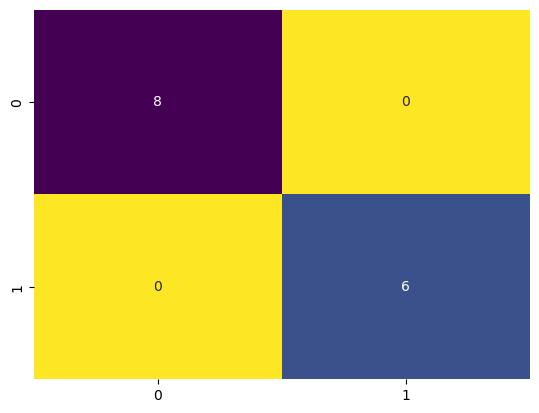

In [67]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(X_test_prediction,Y_test) 
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=ssk.classes_, xticklabels=ssk.classes_)

In [68]:
# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         6

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



## plot graph to compare result of actual and target value


/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Logistic Regression')

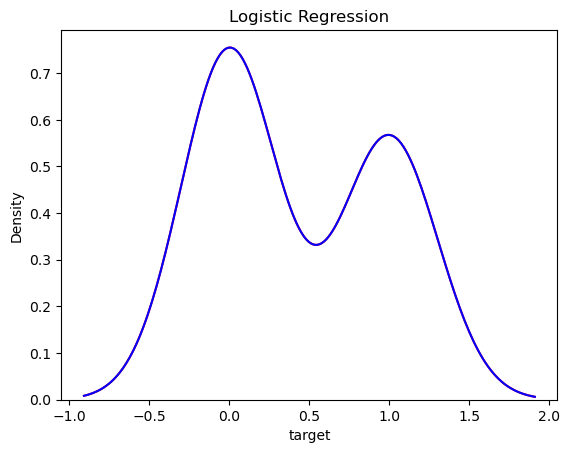

In [73]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_test_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Logistic Regression')

# making a predictive System for testing the data 

In [79]:
# making a predictive System
input_data=(76,80,1,0,0,0,1,0,1)
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
std_data=scaler.transform(std_data)
print(std_data)
prediction=ssk.predict(std_data)#model=Randomforest classification
print("target:",prediction)
if(prediction==0):
    print("No need of Hospitalization")
elif(prediction==1):
    print("Need of Hospitalization")

[[0.78571429 0.58695652 1.         0.         0.         0.
  1.         0.         1.        ]]
[[ 1.28279973 -0.16655041  0.98561076 -0.59408853 -0.54944226 -1.24721913
   1.24721913 -1.10716144  1.10716144]]
target: [1]
Need of Hospitalization


/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [75]:
sts

,age,Blood O2 Level in Percentage,body_temperature_High,body_temperature_Moderate,body_temperature_Normal,chronic_disease_no,chronic_disease_yes,breathing_issue_no,breathing_issue_yes,target
0,10.0,97.0,0,0,1,1,0,1,0,0
1,12.0,97.0,0,0,1,1,0,1,0,0
2,15.0,94.0,0,0,1,1,0,1,0,0
4,13.0,94.0,0,1,0,1,0,1,0,0
5,12.0,97.0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
65,86.0,76.0,1,0,0,1,0,0,1,1
66,61.0,90.0,0,1,0,1,0,0,1,0
67,94.0,64.0,1,0,0,0,1,0,1,1
68,81.0,75.0,1,0,0,0,1,0,1,1


### here my model is correctly predicted 

In [69]:
kk=ProfileReport(spy)

In [70]:
kk

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [71]:
kk.to_file("output.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]